In [8]:
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

1. Выделение самой длинной прямой с помощью преобразования Хафа

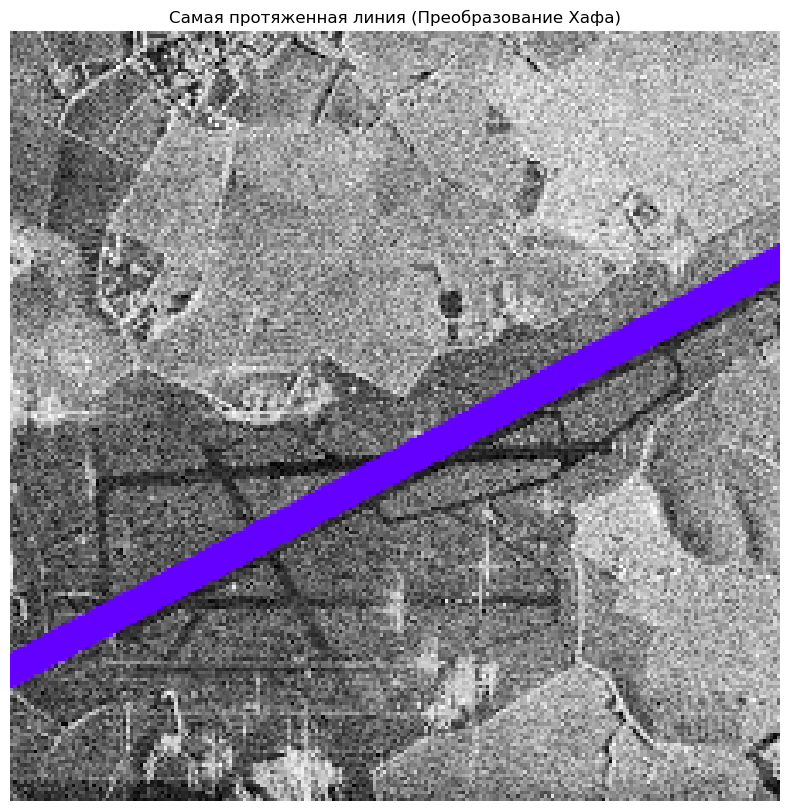

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image_gray_blurred = cv2.GaussianBlur(image_gray, (9, 9), 2)
canny_edges = cv2.Canny(image_gray_blurred, 50, 100, apertureSize=3)
lines = cv2.HoughLines(canny_edges, 1, np.pi / 180, 60)
image_with_lines = image.copy()


if lines is not None:
    longest_line = None
    max_length = 0
    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 200 * (-b)), int(y0 + 200 * (a)))
        pt2 = (int(x0 - 200 * (-b)), int(y0 - 200 * (a)))
        length = np.sqrt((pt2[0] - pt1[0]) ** 2 + (pt2[1] - pt1[1]) ** 2)

        if length > max_length:
            max_length = length
            longest_line = lines[i]

    if longest_line is not None:
        rho = longest_line[0][0]
        theta = longest_line[0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 200 * (-b)), int(y0 + 200 * (a)))
        pt2 = (int(x0 - 200 * (-b)), int(y0 - 200 * (a)))
        cv2.line(image_with_lines, pt1, pt2, (100, 0, 255), 8, cv2.LINE_AA)


plt.figure(figsize=(10, 10))
plt.imshow(image_with_lines)
plt.title("Самая протяженная линия (Преобразование Хафа)")
plt.axis('off')
plt.show()



2. Исследование алгоритмов бинаризации

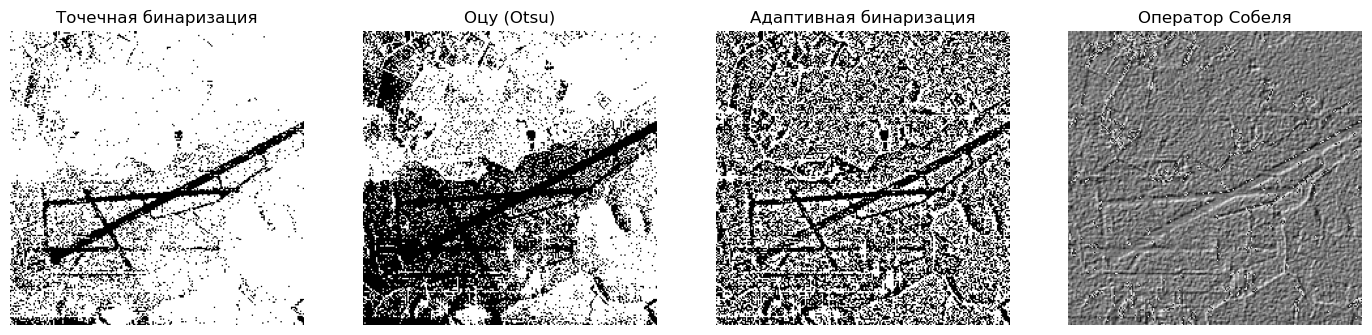

In [7]:
#точечная бинаризация
T = 75
bin_img = image_gray.copy()
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

#бинаризация Оцу 
image_contrast = cv2.convertScaleAbs(image_gray, alpha=1.5, beta=0)  # Увеличиваем контраст
_, th2 = cv2.threshold(image_contrast, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#адаптивная бинаризация
th3 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

#Собеля
scale = 0.5
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0.0)

#сравнение
plt.figure(figsize=(22, 6))

plt.subplot(1, 5, 1)
plt.axis('off')
plt.title('Точечная бинаризация')
plt.imshow(bin_img, cmap="gray")

plt.subplot(1, 5, 2)
plt.axis('off')
plt.title('Оцу (Otsu)')
plt.imshow(th2, cmap="gray")

plt.subplot(1, 5, 3)
plt.axis('off')
plt.title('Адаптивная бинаризация')
plt.imshow(th3, cmap="gray")

plt.subplot(1, 5, 4)
plt.axis('off')
plt.title('Оператор Собеля')
plt.imshow((grad - grad.min()) * 255, cmap="gray")

